In [1]:
import sys
sys.path.append("../src")

In [2]:
from core.simulator import Simulator
from core.network import Network, servers_csv_to_dict, pings_csv_to_dict

network = Network.from_dicts(pings_csv_to_dict("data/datasets/pings.csv"), servers_csv_to_dict("data/datasets/servers.csv"), fraction = 1)

## GossipSub

In [12]:
from core.gossip_algorithm import GossipSub
from core.attacker import create_random_attackers, LowestTimeEstimator

simulator = Simulator(network=network, gossip_algorithm=GossipSub(network, fanout = 8))
all_nodes = [node.node_id for node in simulator.network.nodes]

stretches_gs = []
attacks_gs = []

for i in range(100):
    print(f"{i+1} / 100") if i % 10 == 0 else None
    simulator.setup()
    lst_attackers = create_random_attackers(LowestTimeEstimator, all_nodes, simulator.first_source.node_id, 0.1, num_attackers = 10)
    stretch, attack  = simulator.run(attackers = lst_attackers, msg_receival_limit = 1)
    stretches_gs.append(stretch)
    attacks_gs.append(attack)

1 / 100
11 / 100
21 / 100
31 / 100
41 / 100
51 / 100
61 / 100
71 / 100
81 / 100
91 / 100


## Spatial Gossip

In [ ]:
from core.gossip_algorithm import SpatialGossip
from core.attacker import create_random_attackers, LowestTimeEstimator

simulator = Simulator(network=network, gossip_algorithm=SpatialGossip(network, dimension = 2, rho = 1.2, fanout = 8))
all_nodes = [node.node_id for node in simulator.network.nodes]

stretches_h = []
attacks_h = []

for i in range(100):
    print(f"{i+1} / 100") if i % 10 == 0 else None
    simulator.setup()
    lst_attackers = create_random_attackers(LowestTimeEstimator, all_nodes, simulator.first_source.node_id, 0.1, num_attackers = 10)
    stretch, attack  = simulator.run(attackers = lst_attackers, msg_receival_limit = 60)
    stretches_h.append(stretch)
    attacks_h.append(attack)

1 / 100
11 / 100
21 / 100
31 / 100
41 / 100
51 / 100
61 / 100
71 / 100
81 / 100
91 / 100


GossipSub 2.4232619919628093 Spatial 1.4055118412049998


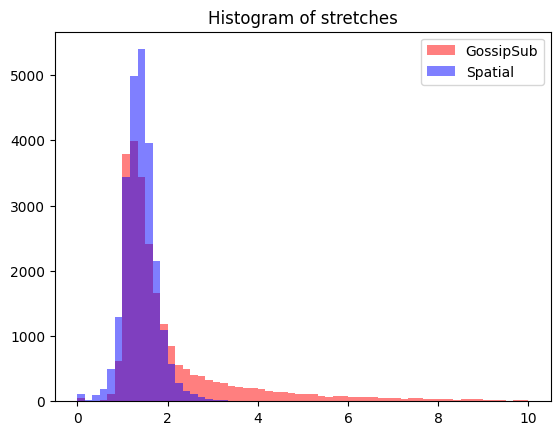

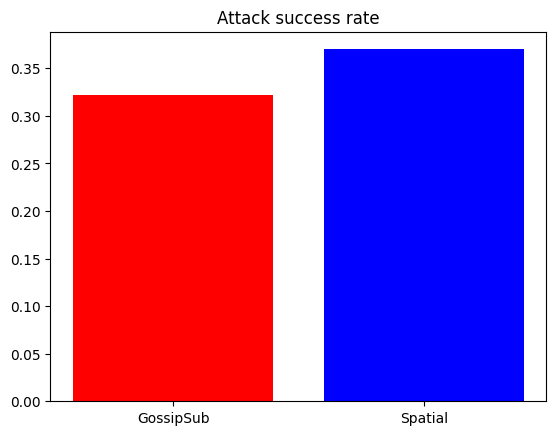

In [16]:
# Histograms
import matplotlib.pyplot as plt
import numpy as np

all_stretches_gs = [stretch.values for stretch in stretches_gs]
all_stretches_gs = [item for sublist in all_stretches_gs for item in sublist]
all_stretches_h = [stretch.values for stretch in stretches_h]
all_stretches_h = [item for sublist in all_stretches_h for item in sublist]
all_attacks_gs = [attack.values for attack in attacks_gs]
all_attacks_gs = [item for sublist in all_attacks_gs for item in sublist]
all_attacks_h = [attack.values for attack in attacks_h]
all_attacks_h = [item for sublist in all_attacks_h for item in sublist]

plt.hist(all_stretches_gs, bins = 60, range = (0, 10), color = 'r', alpha = 0.5, label = "GossipSub")
plt.hist(all_stretches_h, bins = 60, range = (0, 10), color = 'b', alpha = 0.5, label = "Spatial")
print("GossipSub", np.mean(all_stretches_gs), "Spatial", np.mean(all_stretches_h))
plt.legend(loc='upper right')
plt.title("Histogram of stretches")
plt.show()

# attack success rate
success_rate_gs = np.mean(all_attacks_gs)
success_rate_h = np.mean(all_attacks_h)
plt.bar(["GossipSub", "Spatial"], [success_rate_gs, success_rate_h], color = ['r', 'b'])
plt.title("Attack success rate")
plt.show()

